In [17]:
import chaospy as cp
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import chaospy as cp

from temfpy.uncertainty_quantification import eoq_model
from chaospy.distributions.collection.normal import Normal
from scipy.stats import multivariate_normal as multivariate_norm
from scipy.stats import norm



%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
marginals = list()
for center in [1230, 0.0135, 2.15]:
    lower, upper = 0.9 * center, 1.1 * center
    marginals.append(cp.Uniform(lower, upper))
distribution = cp.J(*marginals)

In [3]:
corr = [[1.0, 0.6, 0.2], [0.6, 1.0, 0.0], [0.2, 0.0, 1.0]]
copula = cp.Nataf(distribution, corr)

In [4]:
import econsa
from econsa.sampling import cond_mvn

In [5]:
mean = np.array([1, 1, 1])
sigma = np.array([[4.0677098, -0.9620331, 0.9897267],
                       [-0.9620331, 2.2775449, 0.7475968],
                       [0.9897267, 0.7475968, 0.7336631]])
dependent_ind = [0, ]
given_ind = [1, 2]
given_value = [1, -1]
cond_mean, cond_cov = cond_mvn(mean, sigma, dependent_ind, given_ind, given_value)


[1 1] statss


# Set up a single copula ..

In [6]:
marginals = list()
for center in [1230, 0.0135, 2.15]:
    lower, upper = 0.9 * center, 1.1 * center
    marginals.append(cp.Uniform(lower, upper))

In [7]:
corr = [[1.0, 0.6, 0.2], [0.6, 1.0, 0.0], [0.2, 0.0, 1.0]]
copula = cp.Nataf(distribution, corr)



In [8]:
sample = copula.sample(1000, rule="random")

In [9]:
def plot_joint(sample):
    m, c, s = sample

    g = sns.jointplot(m, c, kind="hex")
    g.set_axis_labels(r"$M$", r"$C$")

    g.ax_joint.get_xaxis().set_major_formatter(
        mpl.ticker.StrMethodFormatter("{x:,.0f}")
    )

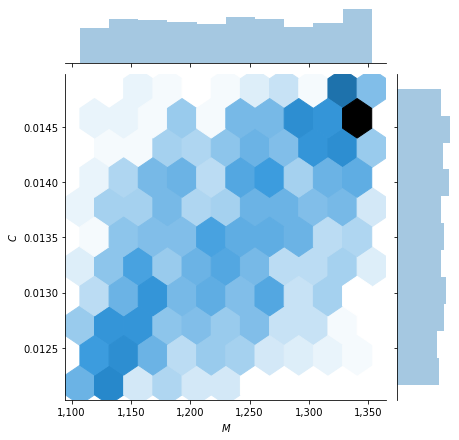

In [10]:
plot_joint(sample)